In [1]:
import math
Epsilon = 0.0001

def sigmoid(x):
    return 1 / ( 1 + math.exp(-x))

def sigmoid_inverse(y,a,b):
    m = (a + b) /2
    if abs(sigmoid(m) - y) < Epsilon:
        return m
    elif abs(sigmoid(m)) > y:
        return sigmoid_inverse(y,a,m)
    else:
        return sigmoid_inverse(y,m,b)
    
    
print(sigmoid_inverse(0.2, -10, 10))

-1.38671875


In [1]:
class Node:
    def __init__(self, num, left, right):
        self.value = num
        (self.left , self.right) = (left, right)


def make_node(num, left, right): 
    return Node(num, left, right) 

def value(tree):
    return tree.value

def left(tree):
    return tree.left
    
def right(tree):
    return tree.right

EmptyTree = None
def is_empty(tree):
    return tree == EmptyTree

def make_leaf(num):
    return make_node(num, EmptyTree, EmptyTree)

def is_leaf(tree):
    return left(tree) == EmptyTree and right(tree) == EmptyTree

def calc1(tree):
    v = value(tree)
    l = value(left(tree))
    r = value(right(tree))
    if v == '+':
        return l + r
    elif v == '-':
        return l - r
    elif v == '*':
        return l * r
    elif v == '/':
        return l / r
    else:
        return v

def calc(tree):
    if is_empty(tree):
        return 0
    elif is_leaf(tree):
        return value(tree)
    elif is_leaf(left(tree)) and is_leaf(right(tree)):
        return calc1(tree)
    else:
        l = calc(left(tree))
        r = calc(right(tree))
        tree = make_node(value(tree),make_leaf(l),make_leaf(r))
        return calc(tree)

t = make_node("+", make_node("*", make_leaf(3), make_leaf(5)), make_leaf(2))
print(calc(t))

17


In [9]:
def binary_search(a, x, l, r):
    m = (l +r) //2
    if (l +1 == r) and (a[l] == x):
        return l
    elif (l +1 == r) and (a[l] != x):
        return -1
    elif (l+1 < r) and (a[m] > x):
        return binary_search(a, x, l,m)
    else:
        return binary_search(a, x, m,r)
    
    
a=[1,3,5,7]
# print(binary_search(a, 1, 0, len(a)))
# binary_search(a, 3, 0, len(a))
# binary_search(a, 5, 0, len(a))
# binary_search(a, 7, 0, len(a)) 
# binary_search(a, 2, 0, len(a)) 

3

[[0, 0], [11.111111111111112, 0.0], [16.666666666666668, 9.622504486493762], [22.222222222222225, 0.0], [33.333333333333336, 0.0], [38.88888888888889, 9.622504486493762], [33.33333333333334, 19.245008972987524], [44.44444444444444, 19.245008972987524], [50.0, 28.867513459481287], [55.55555555555556, 19.245008972987527], [66.66666666666667, 19.245008972987527], [61.111111111111114, 9.622504486493764], [66.66666666666667, 0.0], [77.77777777777779, 0.0], [83.33333333333334, 9.622504486493762], [88.88888888888889, 0.0]]


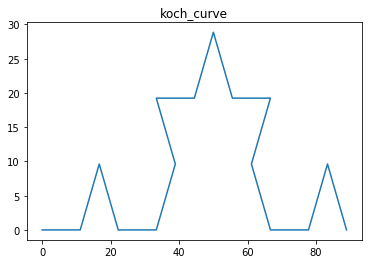

In [16]:
def koch(x0,y0,x1,y1,n):
    import math
    if n==0:
        return [[x0,y0]]
    else:
        dx = x1 - x0
        dy = y1 - y0
        r3 = math.sqrt(3)
        xa = x0 + dx / 3
        ya = y0 + dy /3
        xb = (x0 + dx / 2) - (dy * r3) / 6
        yb = (y0 + dy / 2) + (dx * r3) / 6
        xc = x0 + (2 * dx) / 3
        yc = y0 + (2 * dy) /3
        
        return koch(x0,y0,xa,ya, n-1 ) + koch(xa, ya,  xb , yb, n-1) + koch( xb, yb,xc,yc, n-1) + koch(xc,yc,x1,y1 ,n -1) 
        
%matplotlib inline
def plot_koch(a):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    a_ = np.array(a)
    xlist = a_[:, 0]
    ylist = a_[:, 1]
    
    ax.plot(xlist, ylist)
    ax.set_title('koch_curve')

a = koch(0,0,100,0,2)
plot_koch(a)
print(a)

In [ ]:
def merge(a, b):
    c=[]
    i,j = 0,0
    while i<len(a) and j<len(b):
        if a[i] < b[j]: 
            c.append(a[i])
            i+=1 
        else:
            c.append(b[j])
            j+=1
    # ループ不変条件: a[0:i]とb[0:j]は昇順にcに詰まっている a[i:] # a[i] 以降の a の要素を全て c に詰める
    c += a[i:]
    c += b[j:] 
    return c

def first_half(a):
    b = []
    l = len(a)
    p = l // 2
    if l % 2 == 0:
        for i in range(p):
            b.append(a[i])
    else:
        for i in range(p + 1):
            b.append(a[i])
    return b

def second_half(a):
    b = []
    l = len(a)
    p = l // 2
    if l % 2 == 0:
        for i in range(p,l):
            b.append(a[i])
    else:
        for i in range(p + 1,l):
            b.append(a[i])
    return b

def mergesort(a):
    if len(a) <= 1:
        return a
    
    first = mergesort(first_half(a))
    second = mergesort(second_half(a))

    return merge(first, second)